In [4]:
import xarray as xr
#import rioxarray as rxr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
### Plotting stuff 
plt.rc('figure', figsize=(12, 10))
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB_ex1='#8dd3c7'
CB_ex2='#bebada'
CB_ex3='#ffffb3'
CB_ex4='#fb8072'
CB_ex5='#fdb462'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet,CB_ex1,CB_ex2,CB_ex3,CB_ex4,CB_ex5]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rcParams.update({'font.size': 10})

In [11]:


def ProcessbyPAge(Data,Var,Time):
    out=pd.DataFrame({"Age"+str(Ages[0]):np.array(Data[Var][:,0]).flatten(),
              "Age"+str(Ages[1]):np.array(Data[Var][:,1]).flatten(),
              "Age"+str(Ages[2]):np.array(Data[Var][:,2]).flatten(),
              "Age"+str(Ages[3]):np.array(Data[Var][:,3]).flatten(),
              "Age"+str(Ages[4]):np.array(Data[Var][:,4]).flatten(),
              "Age"+ str(Ages[5]):np.array(Data[Var][:,5]).flatten(),
              "Age"+str(Ages[6]):np.array(Data[Var][:,6]).flatten()
              },index=Time)
    return(out)

def ProcessbyFuelClass(Data,Var,Time):
    out=pd.DataFrame({"FuelClass"+str(FuelClass[0]):np.array(Data[Var][:,0]).flatten(),
              "FuelClass"+str(FuelClass[1]):np.array(Data[Var][:,1]).flatten(),
              "FuelClass"+str(FuelClass[2]):np.array(Data[Var][:,2]).flatten(),
              "FuelClass"+str(FuelClass[3]):np.array(Data[Var][:,3]).flatten(),
              "FuelClass"+str(FuelClass[4]):np.array(Data[Var][:,4]).flatten(),
              "FuelClass"+str(FuelClass[5]):np.array(Data[Var][:,5]).flatten(),
              },index=Time)
    return(out)
def ProcesbyCanopyLay(Data,Var,Time):
    out=pd.DataFrame({"Understory"+str(Canopy[0]):np.array(Data[Var][:,0]).flatten(),
              "Canopy"+str(Canopy[1]):np.array(Data[Var][:,1]).flatten(),
              },index=Time)
    return(out)
def ProcesbyPFT(Data,Var,Time,PFT):
    out=pd.DataFrame({PFT[0]:np.array(Data[Var][:,0]).flatten(),
              PFT[1]:np.array(Data[Var][:,1]).flatten(),
              },index=Time)
    return(out)
def plotterage(data,titlelabel,xlabel,ylabel,legendloc):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['Age0.0'],label="Age 0.0")
    plt.plot(data['Age1.0'],label="Age 1.0")
    plt.plot(data['Age2.0'],label="Age 2.0")
    plt.plot(data['Age5.0'],label="Age 5.0")
    plt.plot(data['Age10.0'],label="Age 10.0")
    plt.plot(data['Age20.0'],label="Age 20.0")
    plt.plot(data['Age50.0'],label="Age 50.0")
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})
    
def plottercan(data,titlelabel,xlabel,ylabel,legendloc):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['Understory1'],label="Understory")
    plt.plot(data['Canopy2'],label="Overstory")
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})

def plottercan(data,titlelabel,xlabel,ylabel,legendloc):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['Understory1'],label="Understory")
    plt.plot(data['Canopy2'],label="Overstory")
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})
    
    
def plotterpft(data,PFT,titlelabel,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data[PFT[0]],label=PFT[0])
    plt.plot(data[PFT[1]],label=PFT[1])
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1),prop={'size': 20})

In [5]:
data_path = "C:/Users/zacha/Documents/GitHub/Transfer_HPC/Secondtryfire.nc"

Fates_xr  = xr.open_dataset(data_path)  
### Set up labels 
test=Fates_xr.coords['time'].values
#print()
Fates_xr=Fates_xr.isel(time=slice(0,np.int(len(test)/2)))

#Fates_xr=Fates_xr.isel(time=slice(240,260))
### Set up labels 
Ages=Fates_xr.coords['fates_levage'].values
Time=Fates_xr.indexes['time'].to_datetimeindex()
FuelClass=Fates_xr.indexes['fates_levfuel'].values  
Canopy=Fates_xr.indexes['fates_levcan'].values  
nscls_bins = len(Fates_xr.variables['fates_levscls'])
npfts = len(Fates_xr.variables['fates_levpft'])
nage_bins = len(Fates_xr.variables['fates_levage'])
print(Time)

DatetimeIndex(['1950-02-01', '1950-03-01', '1950-04-01', '1950-05-01',
               '1950-06-01', '1950-07-01', '1950-08-01', '1950-09-01',
               '1950-10-01', '1950-11-01',
               ...
               '1974-04-01', '1974-05-01', '1974-06-01', '1974-07-01',
               '1974-08-01', '1974-09-01', '1974-10-01', '1974-11-01',
               '1974-12-01', '1975-01-01'],
              dtype='datetime64[ns]', length=300, freq=None)


C:\Users\zacha\Anaconda3\envs\NetCDF\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  if sys.path[0] == '':


In [23]:
list(Fates_xr.keys())

['fates_scmap_levscag',
 'fates_agmap_levscag',
 'fates_pftmap_levscpf',
 'fates_scmap_levscpf',
 'fates_pftmap_levcapf',
 'fates_camap_levcapf',
 'fates_canmap_levcnlf',
 'fates_lfmap_levcnlf',
 'fates_canmap_levcnlfpf',
 'fates_lfmap_levcnlfpf',
 'fates_pftmap_levcnlfpf',
 'fates_scmap_levscagpft',
 'fates_agmap_levscagpft',
 'fates_pftmap_levscagpft',
 'fates_pftmap_levagepft',
 'fates_agmap_levagepft',
 'fates_elmap_levelpft',
 'fates_pftmap_levelpft',
 'fates_elmap_levelcwd',
 'fates_cwdmap_levelcwd',
 'fates_elmap_levelage',
 'fates_agemap_levelage',
 'fates_agmap_levagefuel',
 'fates_fscmap_levagefuel',
 'mcdate',
 'mcsec',
 'mdcur',
 'mscur',
 'nstep',
 'time_bounds',
 'date_written',
 'time_written',
 'lon',
 'lat',
 'area',
 'topo',
 'landfrac',
 'landmask',
 'pftmask',
 'ZSOI',
 'DZSOI',
 'WATSAT',
 'SUCSAT',
 'BSW',
 'HKSAT',
 'ZLAKE',
 'DZLAKE',
 'ACTUAL_IMMOB',
 'ACTUAL_IMMOB_P',
 'ADSORBTION_P',
 'AGB',
 'AGB_SCLS',
 'AR',
 'AREA_BURNT_BY_PATCH_AGE',
 'AREA_PLANT',
 'ARE

In [24]:
#'FIRE_FUEL_BULKD',

Fates_xr['FIRE_NESTEROV_INDEX'].attrs

{'long_name': 'nesterov_fire_danger index',
 'units': 'none',
 'cell_methods': 'time: mean'}

0.02233087085187435

0.046422071754932404

0.12998180091381073

0.6108601689338684

0.33185485005378723

0.020356889814138412

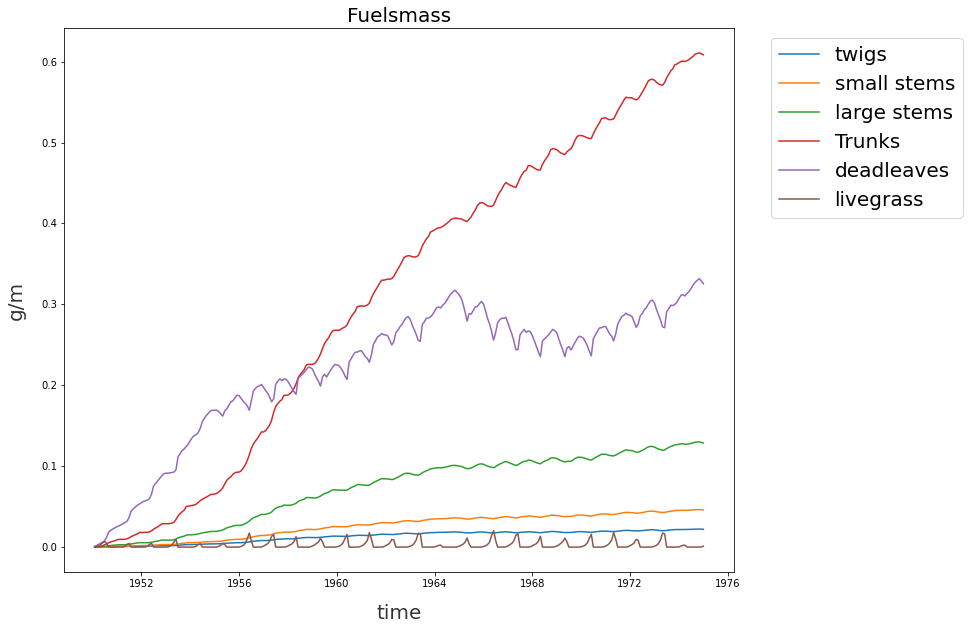

In [18]:
Fuel_Amount=ProcessbyFuelClass(Fates_xr,'FUEL_AMOUNT_BY_NFSC',Time)
def plotterfuel(data,titlelabel,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(titlelabel, fontsize=20)
    plt.plot(data['FuelClass1'],label="twigs")
    plt.plot(data['FuelClass2'],label="small stems")
    plt.plot(data['FuelClass3'],label="large stems")
    plt.plot(data['FuelClass4'],label="Trunks")   
    plt.plot(data['FuelClass5'],label="deadleaves")
    plt.plot(data['FuelClass6'],label="livegrass") 
    ax.set_xlabel(xlabel, labelpad=15, fontsize=20, color="#333533");
    ax.set_ylabel(ylabel, labelpad=15, fontsize=20, color="#333533");
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})
    
plotterfuel(Fuel_Amount,'Fuelsmass','time','g/m')   


max(Fuel_Amount['FuelClass1'])
max(Fuel_Amount['FuelClass2'])
max(Fuel_Amount['FuelClass3'])
max(Fuel_Amount['FuelClass4'])
max(Fuel_Amount['FuelClass5'])
max(Fuel_Amount['FuelClass6'])

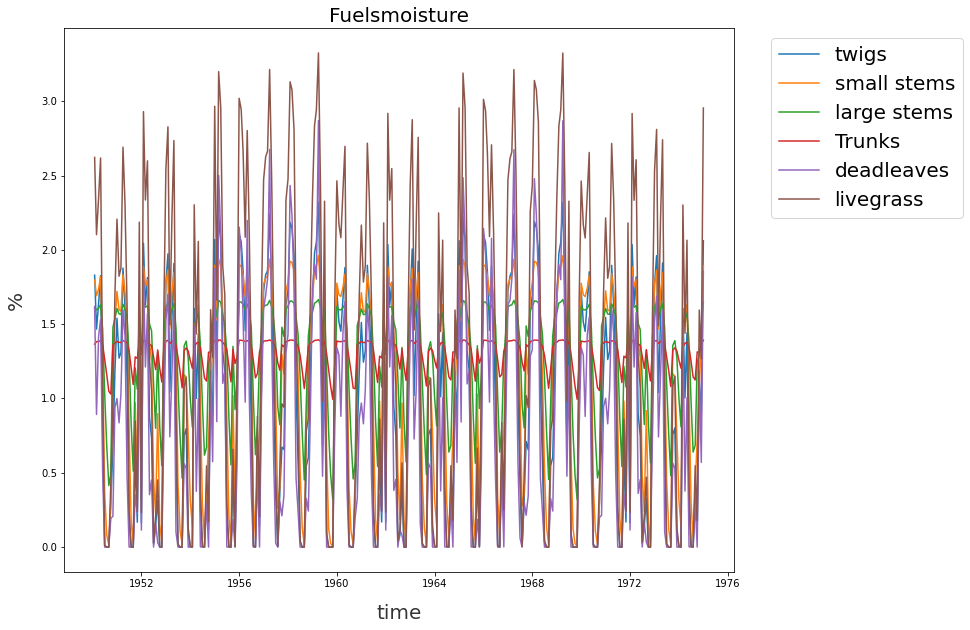

In [21]:


Fuel_Amount=ProcessbyFuelClass(Fates_xr,'FUEL_MOISTURE_NFSC',Time)
plotterfuel(Fuel_Amount,'Fuelsmoisture','time','%')  

Text(0.5, 1.0, 'NI')

190.822762

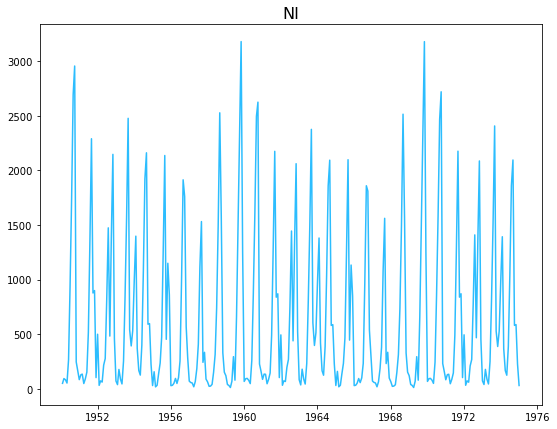

In [25]:
var=np.array(Fates_xr['FIRE_NESTEROV_INDEX']/31)
fig, ax = plt.subplots(figsize=(9, 7))
plt.title( 'NI', fontsize=16)
#plt.axhline(y=1.58, color='r', linestyle='-')
#plt.axhline(y=8.17, color='r', linestyle='-')
plt.plot(Time,var)
2054*.092903

Text(0.5, 1.0, 'Fire intensity (kJ/m/s)')

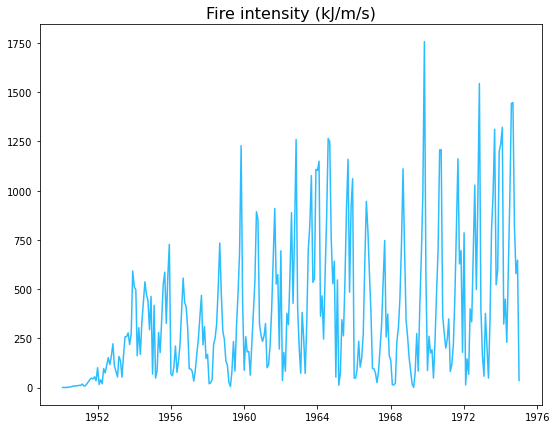

In [26]:
var=np.array(Fates_xr['FIRE_INTENSITY'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Fire intensity (kJ/m/s)", fontsize=16)
#plt.axhline(y=1.58, color='r', linestyle='-')
#plt.axhline(y=8.17, color='r', linestyle='-')
plt.plot(Time,var)

Text(0.5, 1.0, 'Fuel Bulkdensity kg biomass/m3')

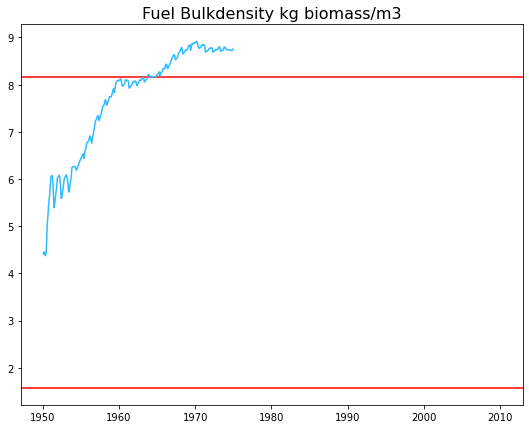

In [27]:
var=np.array(Fates_xr['FIRE_FUEL_BULKD'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Fuel Bulkdensity kg biomass/m3", fontsize=16)
plt.axhline(y=1.58, color='r', linestyle='-')
plt.axhline(y=8.17, color='r', linestyle='-')
plt.plot(Time,var)

Text(0.5, 1.0, 'Nesterov index')

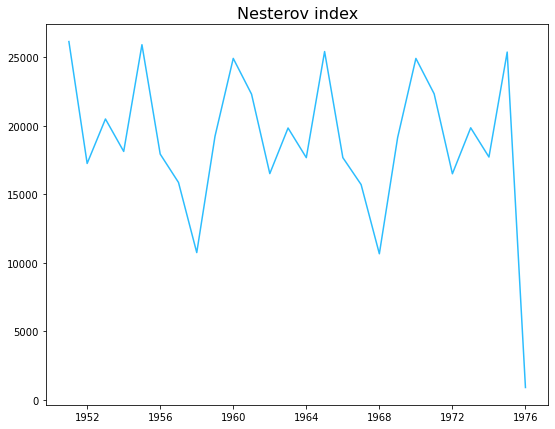

In [28]:
var=np.array(Fates_xr['FIRE_NESTEROV_INDEX'])
var=pd.DataFrame({'NI':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).mean()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Nesterov index", fontsize=16)
plt.plot(var.NI)

Text(0.5, 1.0, ' (kJ/m/s)')

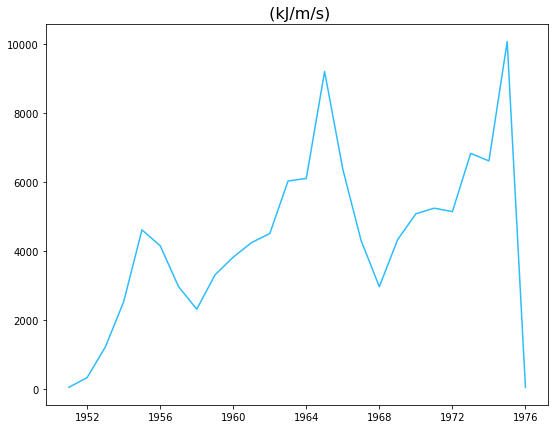

In [29]:
var=np.array(Fates_xr['FIRE_INTENSITY'])

var=pd.DataFrame({'Ignitions':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).sum()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title(" (kJ/m/s)", fontsize=16)
plt.plot(var.Ignitions)

Text(0.5, 1.0, 'Moisture of Exitinction')

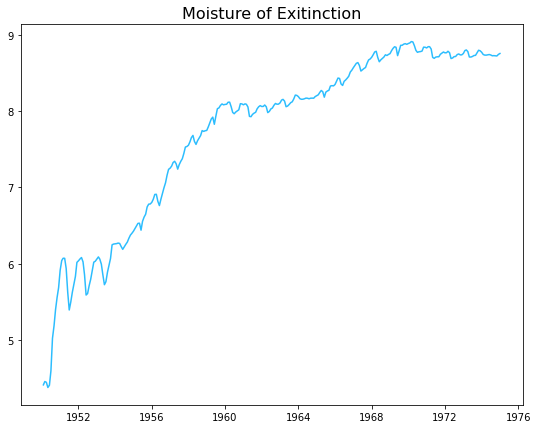

In [30]:
var=np.array(Fates_xr['FIRE_FUEL_BULKD'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title('Moisture of Exitinction', fontsize=16)
plt.plot(Time,var)

Text(0.5, 1.0, 'Intensity')

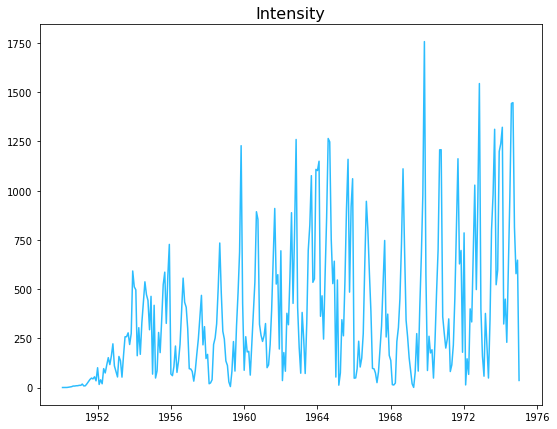

In [31]:
var=np.array(Fates_xr['FIRE_INTENSITY'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title('Intensity', fontsize=16)
plt.plot(Time,var)

Text(0.5, 1.0, 'Aboveground biomass')

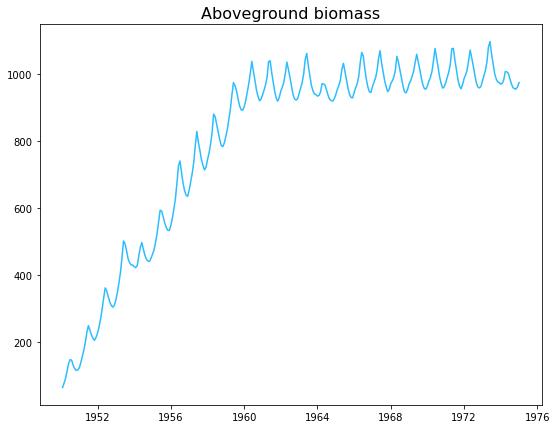

In [32]:
var=np.array(Fates_xr['AGB'])
fig, ax = plt.subplots(figsize=(9, 7))
plt.title('Aboveground biomass', fontsize=16)
plt.plot(Time,var)

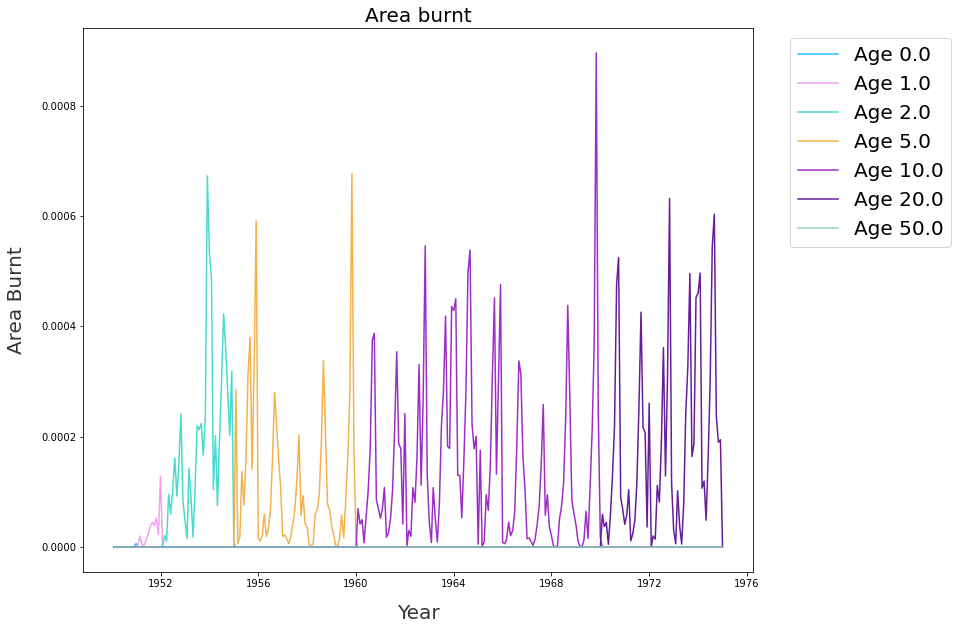

In [33]:
checkout=ProcessbyPAge(Fates_xr,'AREA_BURNT_BY_PATCH_AGE',Time)
plotterage(checkout,"Area burnt","Year","Area Burnt",'lower right')          


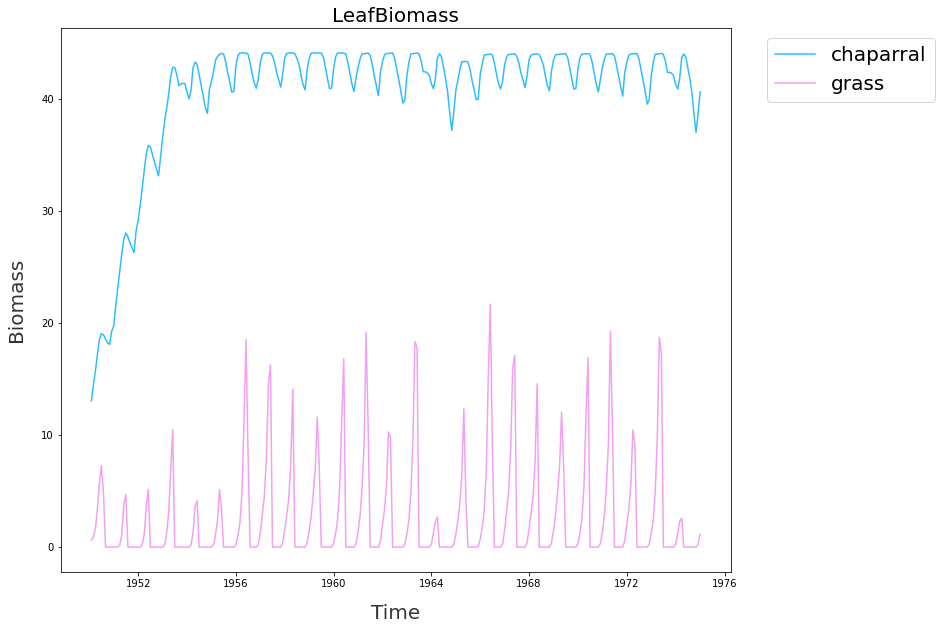

In [34]:
LeafBiobyPFt=ProcesbyPFT(Fates_xr,'PFTleafbiomass',Time,["chaparral","grass"])
plotterpft(LeafBiobyPFt,["chaparral","grass"],"LeafBiomass","Time","Biomass")